In [1]:
import numpy as np
import matplotlib.pyplot as plt
from algo import numf
from peaks import get_neighbors
from utils import initialize_matrices
from multigrid import create_R, get_fine_p

In [2]:
def gauss(x, sigma=1, mean=0, scale=1):
    return scale * np.exp(-np.square(x - mean) / (2 * sigma ** 2))

m = 100
r = 3
p1 = 24
p2 = 50
p3 = 76

x = np.linspace(1, m, m).reshape(-1, 1)
w1 = gauss(x, sigma=2, mean=p1)
w2 = np.concatenate((np.zeros((int((m - p2) / 2), 1)), np.ones((p2, 1)), np.zeros((int((m - p2) / 2), 1))))
w3 = gauss(x, sigma=2, mean=p3)
Wtrue = np.hstack((w1, w2, w3))


n = 6
c = 1/np.sqrt(r-1)
e = 0.001
Htrue = np.array([[c + e, 1-c-e, 0],
                  [1-c-e, c+e, 0],
                  [c+e, 0, 1-c-e],
                  [1-c-e, 0, c+e],
                  [0, c+e, 1-c-e],
                  [0, 1-c-e, c+e]]).T

M = Wtrue @ Htrue

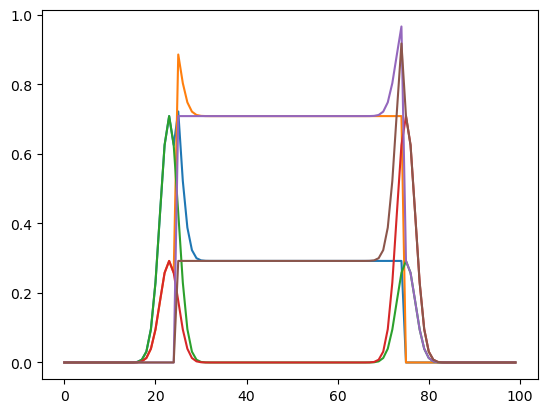

In [3]:
plt.plot(M)

### No Multigrid

In [4]:
iters = 200
# pvals = get_neighbors([p1, p2, p3], m, 5)

In [5]:
W0, H0 = initialize_matrices(m, n, r)

In [6]:
%%time
_, _, _ = numf(M, W0.copy(), H0.copy(), iters=iters)

0.2120662339882746
0.18630924183430966
0.18104275202463813
0.1768582466363512
0.17273199486784901
0.1688168119641507
0.1652991655140655
0.16177796176167644
0.15841853048716165
0.15521421575024402
0.15217140581366864
0.1493897206732648
0.14661944763203275
0.14398595988466825
0.1414826361569681
0.13910361416103328
0.13684336404991626
0.13469630909516708
0.1326196832116289
0.1306960498843814
0.12887783890633328
0.12716295867203892
0.1255296034924207
0.12397963307873157
0.1224930826032103
0.12110589620059597
0.11979556301133229
0.11853761861562907
0.11732941637974093
0.11619436052450047
0.1151176664300768
0.1140860333485515
0.11309819538201685
0.11214746304455592
0.11124777601328409
0.11038985150980331
0.1095605828039892
0.10876188670742762
0.10800073089495409
0.10727217098353634
CPU times: user 3min 55s, sys: 20.8 s, total: 4min 16s
Wall time: 34.6 s


### Multigrid 1-Level

In [7]:
%%time
R1 = create_R(m)
_, H1, pouts1 = numf(R1 @ M, R1 @ W0.copy(), H0.copy(), iters=iters)
fine_pouts1 = get_fine_p(pouts1)
_, _, _ = numf(M, W0.copy(), H1, pvals=get_neighbors(fine_pouts1, m, 3), iters=iters)

0.23965248096462258
0.21467472679695765
0.20567394134350067
0.20115201322721868
0.1979328654304605
0.19531998067397782
0.1928457486328352
0.1902115655809528
0.1874335454773149
0.18472709550242314
0.18204372596597954
0.1793642760375215
0.17666069760673597
0.17392823166764498
0.17119883736720423
0.16847949327106201
0.16573168707375083
0.16299746294694992
0.16037548628782372
0.15777690504047642
0.15527326768974226
0.15288960543777588
0.1506719332053386
0.14853834695717905
0.14648429233643748
0.14451990058242956
0.14268295638399078
0.1409479053554629
0.13929572436965337
0.13770565696947984
0.13618250295242348
0.13471031386531002
0.13330556011455696
0.13194293954616132
0.13063437151043622
0.1293777930426738
0.12817390641400345
0.1269898975346454
0.1259444412740264
0.1248503850440301
0.25910536661161043
0.24704522009391613
0.23670643432712088
0.23112404117253357
0.22725374039194754
0.22410727818569628
0.221366742222232
0.21891592895609072
0.21669357031827707
0.21467324230602675
0.21282270236

### Multigrid Level-2

In [8]:
%%time
R1 = create_R(m)
R2 = create_R(R1.shape[0])
_, H2, pouts2 = numf(R2 @ R1 @ M, R2 @ R1 @ W0.copy(), H0.copy(), iters=iters)
fine_pouts2 = get_fine_p(pouts2, scaling_factor=4)
_, _, _ = numf(M, W0.copy(), H2, pvals=get_neighbors(fine_pouts2, m, 3), iters=iters)

0.18333650394999568
0.16770928161066698
0.1621343692294922
0.15794670748839662
0.1548348639162421
0.15234161569666785
0.1503334356826734
0.1486272504243763
0.14714189914164605
0.14582305212806984
0.14463470568032333
0.14355360193022115
0.14256214709308962
0.1416473212585915
0.14078044798620024
0.13992694221700447
0.13907715390845024
0.1382253316198603
0.13736750161670647
0.13649943406170054
0.13561714273634617
0.13471676957500178
0.13379465243678754
0.13284724578252086
0.131871056021745
0.13086276528149451
0.12981921842648994
0.12873751036261746
0.12761516441046855
0.12645012168013195
0.12524092693711802
0.12398695334075753
0.1226883147354796
0.1213462844406648
0.11996320164404582
0.11854246766002237
0.11708864598339931
0.11560706034387948
0.11410113053153084
0.11257339657882191
0.33736374033302596
0.3162768077292699
0.30423954947114984
0.29949149844252665
0.2963909297815627
0.29401773765323624
0.29206912217545217
0.29039154032425624
0.28893494738856307
0.2876409387000281
0.28648069738

### Regularization Test

0.21226961712963494
0.1861963386104748
0.18092684183842062
0.17673185443909858
0.1726300123993793
0.1687574762689236
0.16507716708187462
0.16175298981622693
0.15841372529081982
0.15522646490957687
0.15218391448229365
0.1492923877227384
0.14654052132526085
0.14392403539839274
0.14143759841592993
0.1390758825483087
0.13683195118995647
0.13469996350075247
0.13267422953494068
0.13075280315332832
0.12894036320450358
0.12721596191590331
0.1255786657766404
0.12400772033772671
0.12254197089659742
0.12115753087706571
0.1198357726713023
0.1185765382326019
0.11736651277866865
0.11623039911592914
0.11515231882032281
0.11411421058750783
0.11311545540960892
0.11217107696466658
0.11127146576830367
0.11040635917932079
0.10957502655423847
0.10877337499057856
0.10801035281468185
0.10727987195878276


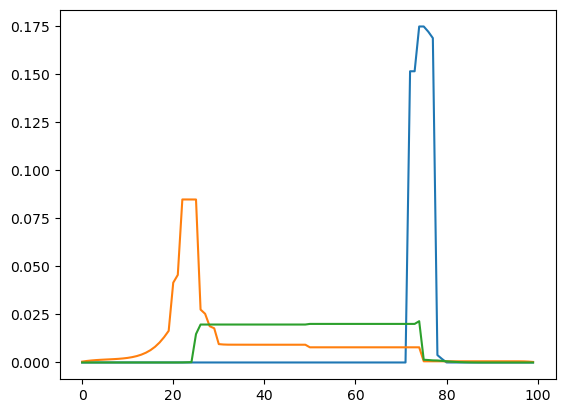

In [9]:
pvals = get_neighbors([p1, p2, p3], m, 5)

# l2 = 0
W0, H0, pouts0 = numf(M, W0.copy(), H0.copy(), pvals=pvals, iters=iters, l2=0)
plt.plot(W0)

0.16709047934884005
0.1590054546329309
0.15644594155345537
0.15561056041612317
0.155329259853973
0.15528378228007236
0.1553563470697907
0.15550759127118477
0.15571839343495372
0.15598485229153883
0.15631584272031726
0.15667648343089396
0.15707578369838313
0.15749720354713007
0.1579405338444424
0.15840533471576307
0.15889278031177106
0.15939615815727845
0.15991556799194476
0.1604493362714428
0.1609970409595656
0.16155641388070766
0.16212493636640166
0.16270056301593036
0.16328220955807957
0.16387063083486683
0.1644639925684498
0.1650641020778289
0.16566855801090222
0.16627191818692635
0.16687514091796027
0.16747966229222677
0.16808572270753877
0.1686914994537073
0.16929633592182844
0.16989994945191284
0.17050100841764218
0.1710993456196813
0.17169499970669544
0.17228926390269234


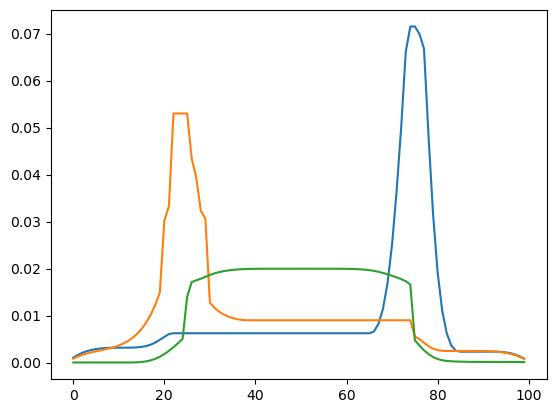

In [10]:
# l2 = 0.3
W1, H1, pouts1 = numf(M, W0.copy(), H0.copy(), pvals=pvals, iters=iters, l2=0.3)
plt.plot(W1)

0.21861360536604865
0.21340602910096046
0.21005068728500062
0.2082982644147524
0.20722201423202966
0.2066098987943748
0.20628260115936625
0.2061762028971813
0.20629677545878028
0.20656550574245935
0.20694192228436714
0.20741399944824757
0.20798467744041604
0.20861996323071852
0.20931298310067645
0.2100529332840613
0.21082582674136566
0.21163428062648582
0.21245640248755404
0.21330165512861862
0.21415697941947348
0.21502473321993282
0.21590317093524436
0.21678922061243253
0.21768291147732932
0.21857919628029762
0.2194758804362524
0.2203711184317891
0.22126322212518573
0.2221510621681502
0.2230335275872637
0.22390886069560226
0.2247759410038387
0.22563465251737072
0.22648371225749375
0.22732248283158965
0.22815029719955043
0.22896696510310496
0.2297715502220237
0.23056365024485465


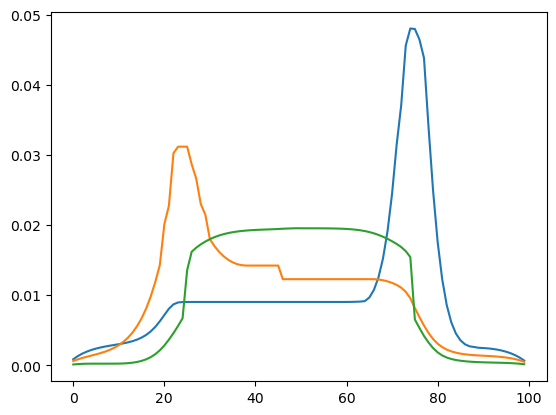

In [11]:
# l2 = 0.6
W2, H2, pouts2 = numf(M, W0.copy(), H0.copy(), pvals=pvals, iters=iters, l2=0.6)
plt.plot(W2)